In [2]:
import pandas as pd
import seaborn as sns
import pystan
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('HPITPdata.csv', index_col=0)

df = df.iloc[2:]

In [74]:
arma_model_code = """
data { 
int<lower=1> T; 
real y[T];
}

parameters { 
real mu; 
//real phi;
real<lower=-1,upper=1> theta; 
real<lower=0> sigma; 
} 

transformed parameters{
real K;
K <- sqrt( (1+theta^2) * sigma^2 );
}

model {
real err; 
mu ~ normal(0,10); 
theta ~ uniform(-1,1); //normal(0,2); 
sigma ~ cauchy(0,5); 
err <- y[1] - 2*mu; 
err ~ normal(0,sigma); 
for (t in 2:T){ 
    err <- y[t] - (mu + y[t-1] + theta * err); 
    err ~ normal(0,sigma);
    }
}
"""

# model {
# vector[T] nu; // prediction for time t
# vector[T] err; // error for time t
 
# nu[1] <- mu + phi * mu; // assume err[0] == 0 
# err[1] <- y[1] - nu[1]; 
# for (t in 2:T) { 
#     nu[t] <- mu + phi * y[t-1] + theta * err[t-1]; 
#     err[t] <- y[t] - nu[t];
#     } 

# mu ~ normal(0,10); // priors
# phi ~ normal(0,2); 
# theta ~ normal(0,2); 
# sigma ~ cauchy(0,5); 
# err ~ normal(0,sigma); // likelihood
# }

In [75]:
arma_model = pystan.StanModel(model_code=arma_model_code)

In [76]:
col = 'DNA Sequencing'
d = df[col].dropna().values.astype('float')
data = {'y':log(d),
   'T':len(d)}
fit = arma_model.sampling(data=data)

In [77]:
random_walk_parameters = pd.DataFrame(columns=['mu', 'K', 'theta', 'sigma'], dtype='float')

for col in df.columns:
    print(col)
    d = df[col].dropna().values.astype('float')
    data = {'y':log(d)/3,
       'T':len(d)}
    fit = arma_model.sampling(data=data)
    random_walk_parameters.ix[col, 'mu'] = fit['mu'].mean()
    random_walk_parameters.ix[col, 'K'] = fit['K'].mean()
    random_walk_parameters.ix[col, 'theta'] = fit['theta'].mean()
    random_walk_parameters.ix[col, 'sigma'] = fit['sigma'].mean()
# random_walk_parameters = random_walk_parameters.astype('float')

AcrylicFiber
Acrylonitrile
Aluminum
Ammonia
Aniline
Automotive (US)
Beer (Japan)
Benzene
BisphenolA
Caprolactam
CarbonBlack
CarbonDisulfide
CCGT Power
Concentrating Solar
Corn (US)
Crude Oil
Cyclohexane
DNA Sequencing
DRAM
Electric Range
Ethanol (Brazil)
Ethanolamine
Ethylene
Formaldehyde
Free Standing Gas Range
Geothermal Electricity
Hard Disk Drive
HydrofluoricAcid
IsopropylAlcohol
Laser Diode
Low Density Polyethylene
Magnesium
MaleicAnhydride
Methanol
Milk (US)
Monochrome Television
Motor Gasoline
NeopreneRubber
Nuclear Electricity
Onshore Gas Pipeline
Paraxylene
Pentaerythritol
Phenol
Photovoltaics
PhthalicAnhydride
PolyesterFiber
PolyethyleneHD
PolyethyleneLD
Polypropylene
Polystyrene
Polyvinylchloride
Primary Aluminum
Primary Magnesium
Refined Cane Sugar
Sodium
SodiumChlorate
SodiumHydrosulfite
Sorbitol
Styrene
Titanium Sponge
Titanium Dioxide
Transistor
Urea
VinylAcetate
VinylChloride
Wind Turbine (Denmark)


In [78]:
# K = 0.24
# theta = 0.19
# sqrt(K**2/(1+theta**2))

# sqrt((1+theta**2)*.24**2)

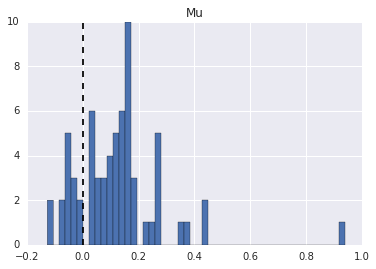

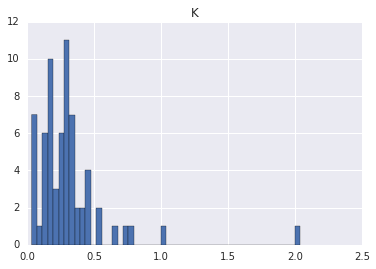

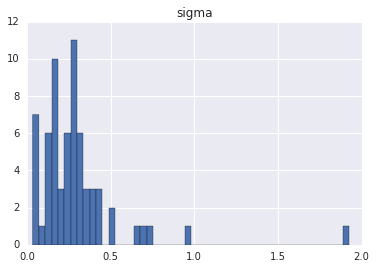

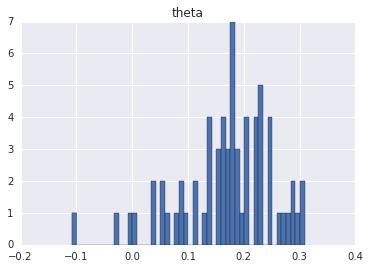

In [83]:
random_walk_parameters['mu'].hist(bins=50)
plot((0,0), ylim(), 'k--')
title("Mu")
figure()
random_walk_parameters['K'].hist(bins=50)
title("K")
figure()
random_walk_parameters['sigma'].hist(bins=50)
title("sigma")
figure()
random_walk_parameters['theta'].hist(bins=50)
title("theta")

In [80]:
random_walk_log_parameters = log10(random_walk_parameters)

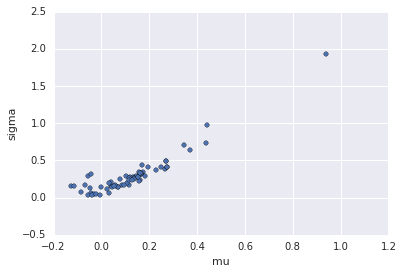

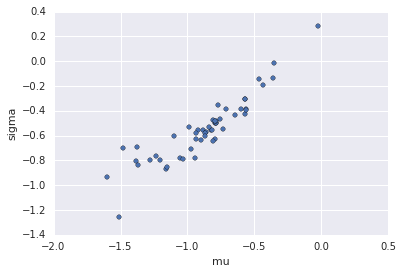

In [84]:
random_walk_parameters.plot('mu', 'sigma', kind='scatter')
figure()
random_walk_log_parameters.plot('mu', 'sigma', kind='scatter')

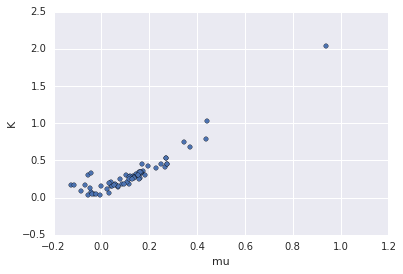

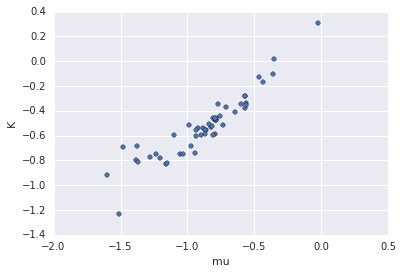

In [81]:
random_walk_parameters.plot('mu', 'K', kind='scatter')
figure()
random_walk_log_parameters.plot('mu', 'K', kind='scatter')

In [65]:
from scipy.stats import linregress
linregress(random_walk_parameters['mu'], random_walk_parameters['K'])

LinregressResult(slope=1.5410258060945865, intercept=0.36547102119024721, rvalue=0.88188656047383718, pvalue=1.4139947626816191e-22, stderr=0.10298016395963035)

In [31]:
files[0].split('_v1')[0]

['combustion_combo3_passcar_air_piston_and_turbine_engine_w_per_$',
 '_11.14.2013.xlsx']

In [16]:
from os import listdir
files = listdir('Rates_11.18.13_PRM/')
for f in files:
    f = pd.read_excel('Rates_11.18.13_PRM/'+f,sheetname='rawdata',index_col=0)
    print(f)

    Year    w/$
0   1896  0.001
1   1902  0.005
2   1903  0.008
3   1914  0.015
4   1915  0.018
5   1916  0.018
6   1917  0.020
7   1918  0.021
8   1919  0.005
9   1922  0.059
10  1925  0.076
11  1927  0.016
12  1931  0.220
13  1931  0.024
14  1932  0.202
15  1933  0.242
16  1933  0.019
17  1934  0.246
18  1935  0.246
19  1935  0.022
20  1936  0.236
21  1937  0.250
22  1937  0.030
23  1938  0.321
24  1939  0.206
25  1939  0.020
26  1940  0.199
27  1940  0.028
28  1941  0.207
29  1941  0.020
..   ...    ...
49  1961  0.276
50  1963  0.016
51  1965  0.016
52  1967  0.007
53  1970  0.464
54  1971  0.473
55  1972  0.340
56  1973  0.318
57  1973  0.011
58  1975  0.220
59  1977  0.211
60  1978  0.233
61  1979  0.224
62  1979  0.016
63  1980  0.183
64  1981  0.185
65  1982  0.206
66  1984  0.235
67  1985  0.253
68  1986  0.271
69  1987  0.319
70  1990  0.314
71  1990  0.027
72  1991  0.364
73  1993  0.363
74  1994  0.366
75  1996  0.028
76  1998  0.050
77  1999  0.050
78  2002  0.008

[79 row

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'{}'